In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from numpy.lib.stride_tricks import sliding_window_view
from scipy.spatial.distance import cdist

In [15]:
def z_matrixprofile(signal,wlen): 
    X =sliding_window_view(signal,wlen)
    X_bar = np.mean(X,axis=1).reshape(-1,1)
    X = X-X_bar
    X = X/np.linalg.norm(X,axis=1).reshape(-1,1)
    A = cdist(X,X)
    for i in range(wlen): 
        np.fill_diagonal(A[i:,:],np.inf)
        np.fill_diagonal(A[:,i:],np.inf)
    P = np.min(A,axis=1)
    IDX = np.argmin(A,axis = 1)
    return P,IDX

def z_distanceprofile(signal,subsequence): 
    wlen = subsequence.shape[0]
    X =sliding_window_view(signal,wlen)
    X_bar = np.mean(X,axis=1).reshape(-1,1)
    X = X-X_bar
    X = X/np.linalg.norm(X,axis=1).reshape(-1,1)
    sub = subsequence.copy()
    sub = sub-np.mean(sub)
    sub = sub/np.linalg.norm(sub)
    sub = sub.reshape(1,-1)
    distance_profile = np.linalg.norm(X-sub,axis=1)
    return distance_profile

def lt_matrixprofile(signal,wlen):
    X =sliding_window_view(signal,wlen)
    X_bar = np.mean(X,axis=1).reshape(-1,1)
    t = np.arange(wlen)
    t_bar = np.mean(t)
    a = (np.sum(X*t,axis=1).reshape(-1,1)/wlen - X_bar*t_bar)/np.std(t)**2
    b = X_bar - a*t_bar
    X = X- (a*t +b)
    X /= np.linalg.norm(X,axis=1).reshape(-1,1)
    A = cdist(X,X)
    for i in range(wlen):
        np.fill_diagonal(A[i:,:],np.inf)
        np.fill_diagonal(A[:,i:],np.inf)
    P = np.min(A,axis=1)
    IDX = np.argmin(A,axis = 1)
    return P,IDX
def lt_distanceprofile(signal,subsequence): 
    wlen = subsequence.shape[0]
    X =sliding_window_view(signal,wlen)
    X_bar = np.mean(X,axis=1).reshape(-1,1)
    t = np.arange(wlen)
    t_bar = np.mean(t)
    a = (np.sum(X*t.reshape(1,-1),axis=1).reshape(-1,1)/wlen - X_bar*t_bar)/np.std(t)**2
    b = X_bar - a*t_bar
    X = X- (a*t +b)
    X /= np.linalg.norm(X,axis=1).reshape(-1,1)
    sub = subsequence.copy()
    a_sub = (np.sum(sub*t)/wlen -t_bar*np.mean(sub))/np.std(t)**2
    b_sub = np.mean(sub) - a_sub * t_bar
    sub = sub - (a_sub * t + b_sub)
    sub = sub/np.linalg.norm(sub)
    sub = sub.reshape(1,-1)
    distance_profile = np.linalg.norm(X-sub,axis=1)
    return distance_profile


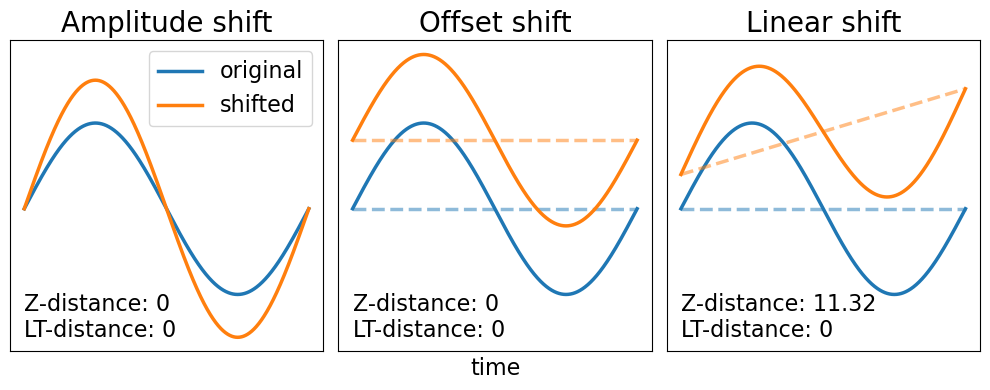

In [16]:
fig,axs = plt.subplots(1,3,figsize = (10,4),sharex=True, sharey=True)
t = np.linspace(0,2*np.pi,1000)
s = np.sin(t)

axs[0].plot(s,color = "tab:blue",label="original",linewidth=2.5)
axs[0].plot(1.5*s,color = "tab:orange",label = "shifted",linewidth=2.5)

offset = 0.8
axs[1].hlines(0,0,1000,color="tab:blue",alpha = 0.5, linestyle = "--",linewidth=2.5)
axs[1].plot(s,color = "tab:blue",linewidth=2.5)
axs[1].hlines(offset,0,1000,color="tab:orange",alpha = 0.5, linestyle = "--",linewidth=2.5)
axs[1].plot(s +offset,color = "tab:orange",linewidth=2.5)

lt = 1*np.linspace(0,1,1000) + 0.4
axs[2].hlines(0,0,1000,color="tab:blue",alpha = 0.5, linestyle = "--",linewidth=2.5)
axs[2].plot(s,color = "tab:blue",linewidth=2.5)
axs[2].plot(lt,color="tab:orange",alpha = 0.5, linestyle = "--",linewidth=2.5)
axs[2].plot(s+lt,color = "tab:orange",linewidth=2.5)


axs[0].set_title("Amplitude shift",fontsize=20)
axs[1].set_title("Offset shift",fontsize=20)
axs[2].set_title("Linear shift",fontsize=20)

axs[0].legend(fontsize=16)

axs[1].set_xlabel("time",fontsize=16)

axs[0].text(0, -1.5, 'Z-distance: 0 \nLT-distance: 0', fontsize=16)
axs[1].text(0, -1.5, 'Z-distance: 0 \nLT-distance: 0', fontsize=16)
axs[2].text(0, -1.5, 'Z-distance: 11.32 \nLT-distance: 0', fontsize=16)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

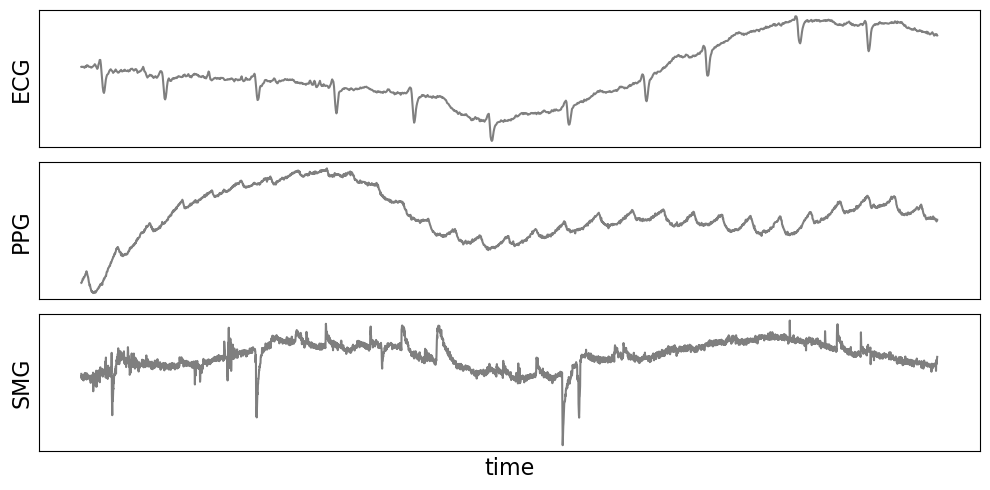

In [17]:
fig, axs = plt.subplots(3,1,figsize=(10,5))

idx = 6
signal = np.loadtxt("illustrative_ecg.csv")
axs[0].plot(signal,color = "black", alpha = 0.5)
axs[0].set_ylabel("ECG",fontsize=16)

signal = np.loadtxt("illustrative_ppg.csv")
axs[1].plot(signal[::4], color = "black", alpha = 0.5)
axs[1].set_ylabel("PPG",fontsize=16)

signal = np.loadtxt("illustrative_seismic.csv")
axs[2].plot(signal[::10], color = "black", alpha = 0.5)
axs[2].set_ylabel("SMG",fontsize=16)
axs[2].set_xlabel("time",fontsize=16)
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()

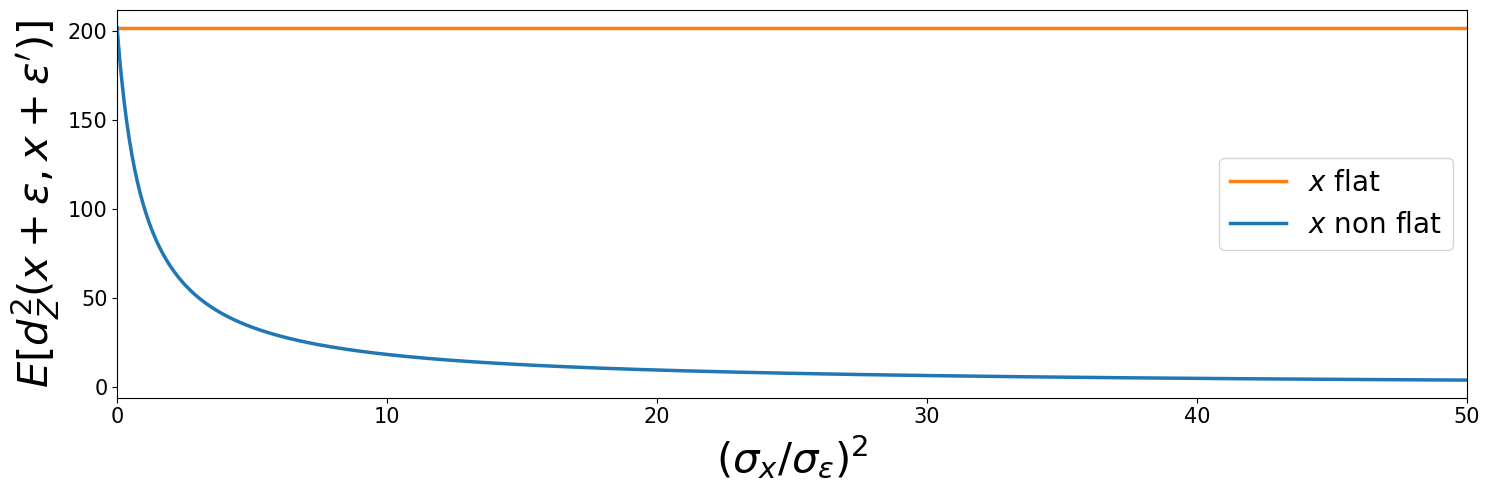

In [18]:
wlen = 100 
ratio_var = np.linspace(0,50,1000)
mean_dist = 2*wlen *(wlen/(wlen-1))*1/(1+ratio_var)

plt.figure(figsize = (15,5))
plt.axhline(2* wlen*(wlen/(wlen-1)),color = "tab:orange", label=r"$x$ flat",linewidth=2.5)
plt.plot(ratio_var,mean_dist, label=r"$x$ non flat",color="tab:blue",linewidth=2.5)
plt.xlim((0,50))
plt.xlabel(r"$(\sigma_x/\sigma_\epsilon)^2$",fontsize = 30)
plt.ylabel(r"$E[d^2_Z(x+\epsilon,x+\epsilon')]$",fontsize = 30)
plt.xticks(fontsize=15)
plt.yticks(np.array([0,0.5,1,1.5,2])*wlen,fontsize=15)
plt.legend(fontsize=20)
plt.tight_layout()

/tmp/ipykernel_2053170/2389555885.py:12: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  axs[0].add_patch(Arc([0,0],500,1.5,0,0,0.1,linewidth=2.5))
/tmp/ipykernel_2053170/2389555885.py:32: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
/tmp/ipykernel_2053170/2389555885.py:34: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)


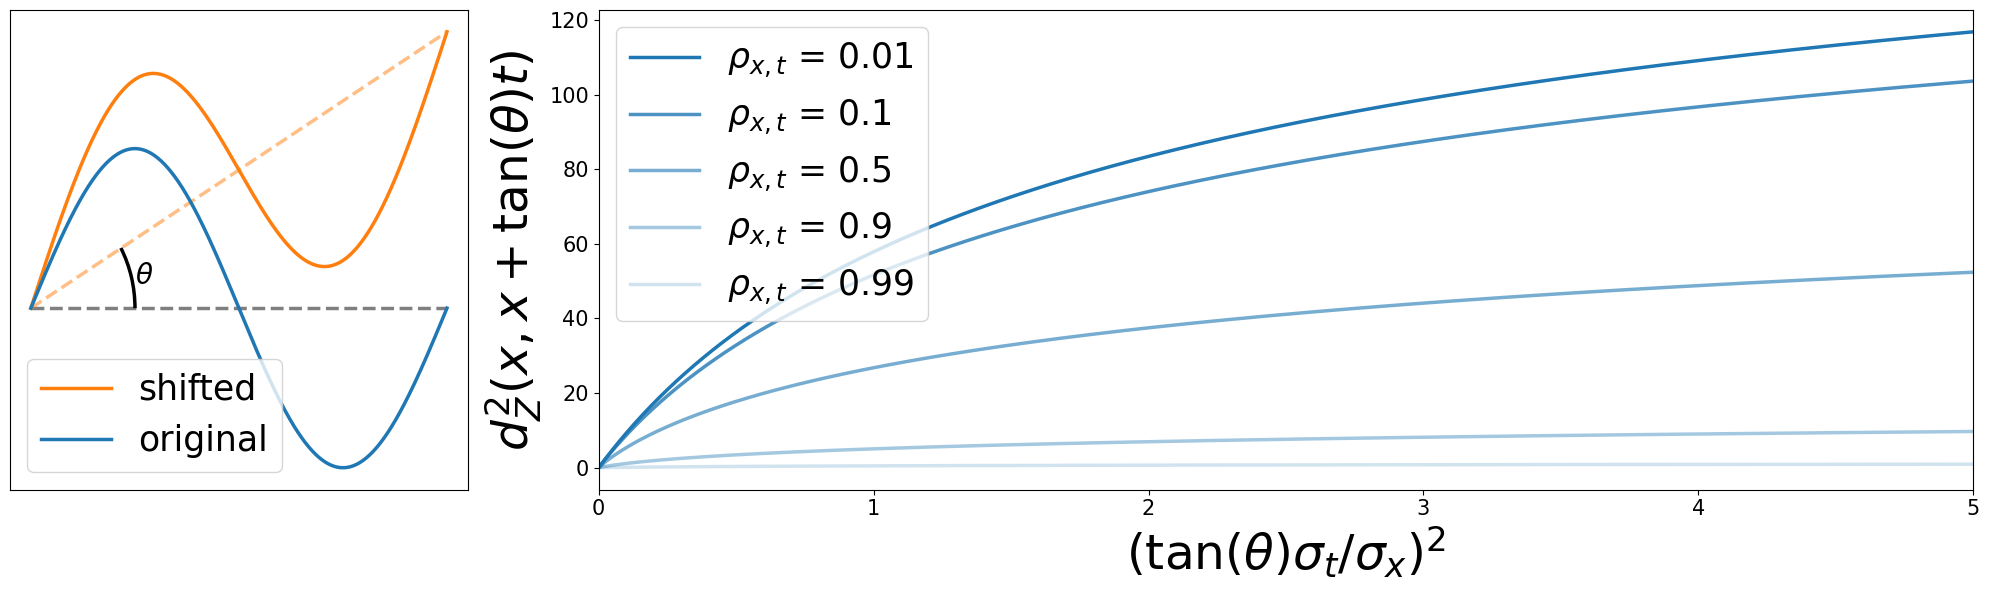

In [19]:
fig,axs = plt.subplots(1,2,gridspec_kw={'width_ratios': [1,3]},figsize = (20,6))

t = np.linspace(0,1,1000)
s = np.sin(2*np.pi*t)
thz = np.pi/3
line = np.tan(thz)*t

axs[0].hlines(0,0,1000,color="black",alpha = 0.5, linestyle = "--",linewidth=2.5)
axs[0].plot(line,color="tab:orange",alpha = 0.5, linestyle = "--",linewidth=2.5)
axs[0].plot(s+line,color = "tab:orange",label="shifted",linewidth=2.5)
axs[0].plot(s,color = "tab:blue", label = "original",linewidth=2.5)
axs[0].add_patch(Arc([0,0],500,1.5,0,0,0.1,linewidth=2.5))
axs[0].text(250,0.15, r"$\theta$",fontsize= 20)
axs[0].legend(fontsize=25)
axs[0].set_xticks([])
axs[0].set_yticks([])

wlen = 100
rhos = [0.01,0.1,0.5,0.9,0.99]
ratio_var = np.linspace(0,5,1000)

for i,rho in enumerate(rhos):
    num = 1+ np.sqrt(ratio_var)* rho
    denom = np.sqrt(ratio_var + 2*np.sqrt(ratio_var)*rho +1)
    dist = 2*wlen*(1-num/denom)
    axs[1].plot(ratio_var,dist, label = r"$\rho_{x,t}$"+f" = {rho}",color = "tab:blue",alpha = 1-i/(len(rhos)),linewidth=2.5)

axs[1].set_xlim((0,5))
axs[1].set_xlabel(r"$(\tan(\theta)\sigma_t/\sigma_x)^2$",fontsize = 35)
axs[1].set_ylabel(r"$d^2_{Z}(x,x+\tan(\theta)t)$",fontsize = 35)
for tick in axs[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in axs[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
axs[1].legend(fontsize=25)
fig.tight_layout()

## ECG example 

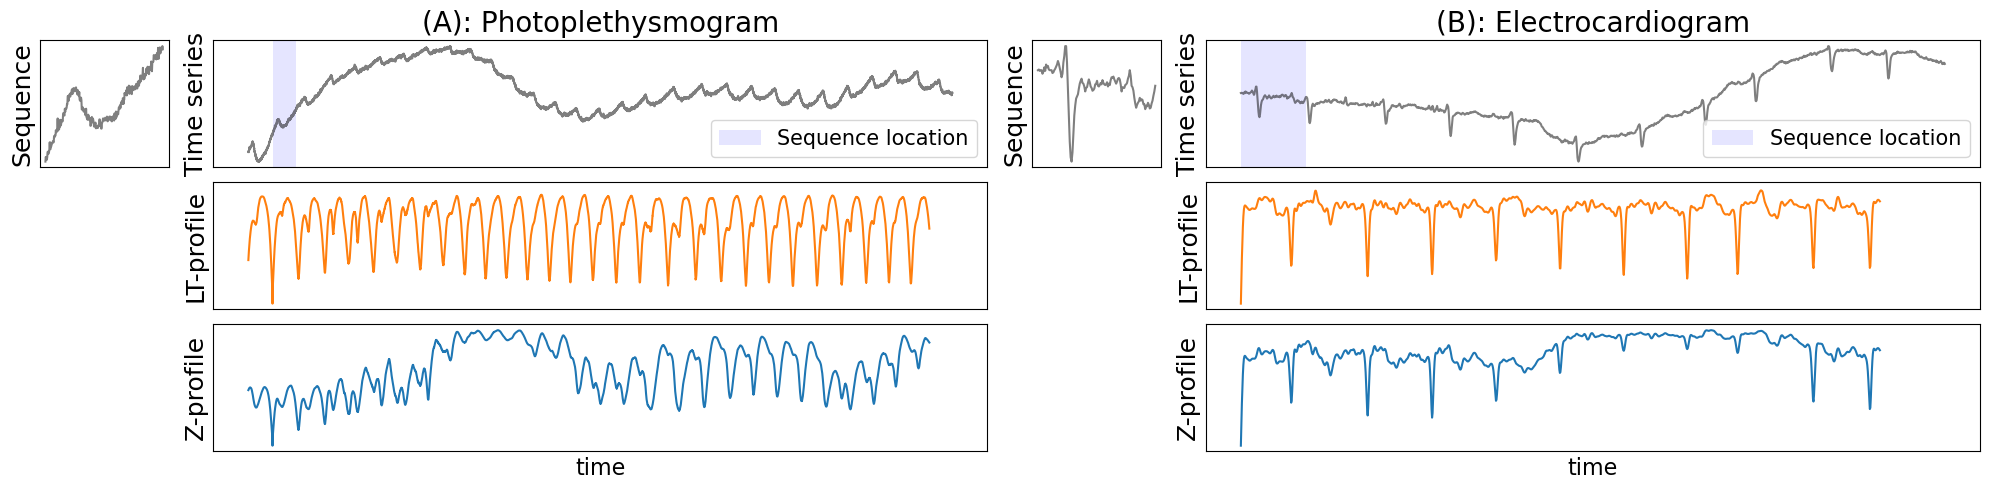

In [20]:
signal = np.loadtxt("illustrative_ppg.csv")
subsequence = signal[343:670].copy()
profile_a = lt_distanceprofile(signal,subsequence)
profile_z = z_distanceprofile(signal,subsequence)
fig,axs = plt.subplots(3,4,figsize = (20,5),gridspec_kw={'width_ratios': [1,6,1,6]})
axs[0,0].plot(subsequence,color = "black", alpha = 0.5)
axs[0,1].plot(signal,color = "black", alpha = 0.5)
sidx = np.where(profile_a == 0)[0][0]
axs[0,1].set_title("(A): Photoplethysmogram",fontsize=20)
axs[0,1].axvspan(343,670,facecolor = "blue", alpha=0.1,label = "Sequence location")
axs[0,1].legend(fontsize=15,loc=4)

axs[1,1].plot(profile_a,color = "tab:orange",alpha=1)
axs[2,1].plot(profile_z,color = "tab:blue",alpha=1)

axs[2,1].sharex(axs[0,1])
axs[0,1].sharex(axs[1,1])
axs[1,1].sharey(axs[2,1])

axs[0,0].set_ylabel("Sequence",   fontsize=18)
axs[0,1].set_ylabel("Time series",fontsize=18)
axs[1,1].set_ylabel("LT-profile" ,fontsize=18)
axs[2,1].set_ylabel("Z-profile"  ,fontsize=18)

signal = np.loadtxt("illustrative_ecg.csv")
subsequence = signal[:130].copy()
profile_a = lt_distanceprofile(signal,subsequence)
profile_z = z_distanceprofile(signal,subsequence)

axs[0,2].plot(subsequence,color = "black", alpha = 0.5)
axs[0,3].plot(signal,color = "black", alpha = 0.5)
axs[0,3].axvspan(0,len(subsequence),facecolor = "blue", alpha=0.1,label = "Sequence location")
axs[0,3].legend(fontsize=15,loc=4)

axs[1,3].plot(profile_a,color = "tab:orange",alpha=1)
axs[2,3].plot(profile_z,color = "tab:blue",alpha=1)

axs[2,3].sharex(axs[0,3])
axs[0,3].sharex(axs[1,3])
axs[1,3].sharey(axs[2,3])

axs[0,3].set_title("(B): Electrocardiogram",fontsize=20)
axs[0,2].set_ylabel("Sequence",   fontsize=18)
axs[0,3].set_ylabel("Time series",fontsize=18)
axs[1,3].set_ylabel("LT-profile" ,fontsize=18)
axs[2,3].set_ylabel("Z-profile"  ,fontsize=18)

axs[2,1].set_xlabel("time",fontsize=16)
axs[2,3].set_xlabel("time",fontsize=16)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

fig.delaxes(axs[1,0])
fig.delaxes(axs[2,0])
fig.delaxes(axs[1,2])
fig.delaxes(axs[2,2])
fig.tight_layout()